# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def roll(n):
    return pd.DataFrame([np.random.randint(1, 7) for i in range(n)],columns=['roll'])

df = roll(10)

#### 2.- Plot the results sorted by value.

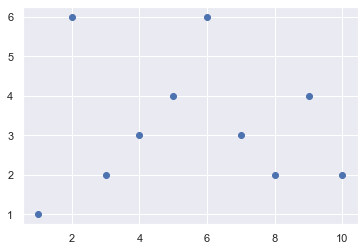

In [3]:
# your code here

df = df.sort_values(by='roll',ascending=True)

plt.scatter(df.index +1, df['roll'])
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:>

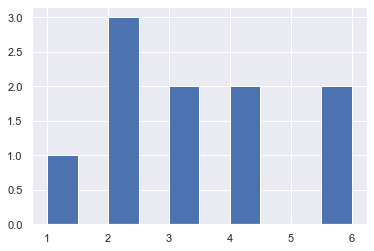

In [4]:
# your code here
df['roll'].hist()

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [5]:
# your code here
def x_mean(x):
    return sum(x) / len(x)

x_mean(df['roll'])

3.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

frequencies = df.value_counts(ascending=True)

x_mean(frequencies)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [7]:
# your code here
def median(x):
    x.sort_values()
    
    if len(x) %2 == 0:
        return sum(x[int(len(x)/2)-1 : int(len(x)/2)+1])/2
    else:
        x[int(len(x)/2)]
        
median(df['roll'])

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [8]:
#(df['roll']).describe()

In [9]:
# your code here
def quart(x):
    y = sorted(x)
    z = int(len(x)/4) #convert to int, float not allowed
    
    q1 = y[z]
    q2 = median(x)
    q3 = y[(z*3)+1]
    q4 = y[-1]
    
    return [q1, q2, q3, q4]

quart(df['roll'])

[2, 3.0, 4, 6]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:>

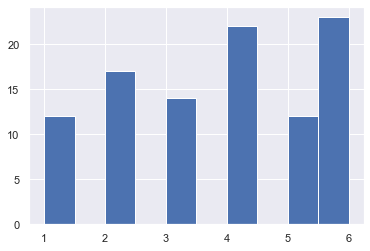

In [10]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv')

x = data.sort_values(by='value',ascending=True)

x['value'].hist()

In [11]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here
x_mean(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here
x['value'].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

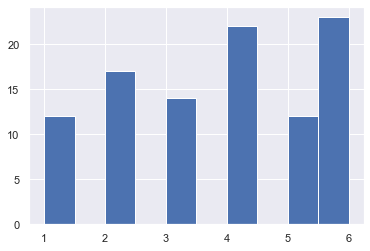

In [14]:
# your code here
x['value'].hist()

In [15]:
"""
The mean is close to the median 

"""

'\nThe mean is close to the median \n\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

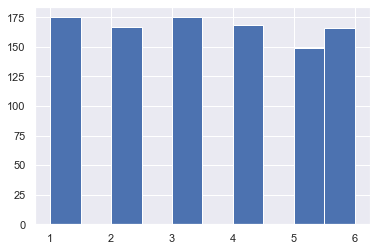

In [16]:
# your code here

data2 = pd.read_csv('../data/roll_the_dice_thousand.csv')

y = data2.sort_values(by='value',ascending=True)

y['value'].hist()

In [17]:
"""
The values are more evenly distribution

"""

'\nThe values are more evenly distribution\n\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

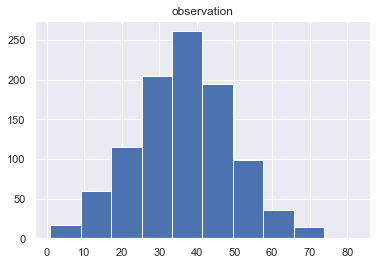

In [18]:
# your code here
data3 = pd.read_csv('../data/ages_population.csv')

data3.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [19]:
# your code here
print(data3['observation'].mean())
print(data3['observation'].std())

36.56
12.816499625976762


In [20]:
"""
normalize distribution

"""

'\nnormalize distribution\n\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

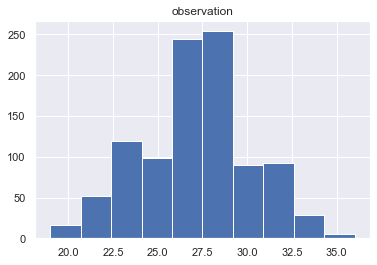

In [21]:
# your code here
data4 = pd.read_csv('../data/ages_population2.csv')

data4.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [22]:
"""
denormalized distribution

"""

'\ndenormalized distribution\n\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [23]:
# your code here
print(data4['observation'].mean())
print(data4['observation'].std())

27.155
2.969813932689186


In [24]:
"""
Both results are lower compared with before

"""

'\nBoth results are lower compared with before\n\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

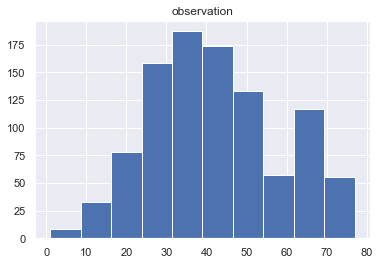

In [25]:
# your code here
data5 = pd.read_csv('../data/ages_population3.csv')

data5.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [26]:
# your code here
print(data5['observation'].mean())
print(data5['observation'].std())

41.989
16.144705959865934


In [27]:
"""
Both results are higher compared with before
"""

'\nBoth results are higher compared with before\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [28]:
# your code here
data5['observation'].quantile([0.25,0.5,0.75])

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

In [29]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [30]:
# your code here
data5['observation'].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [31]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [32]:
# your code here

In [33]:
"""
your comments here
"""

'\nyour comments here\n'